
**Name:**  
**StudentID:**   

# Linear and Logistic Regression

### Instructions
- Download the datasets `heights_weights.csv`, `advertising.csv`, and `banknote_authentication.csv` from the course webpage. **Place these files in the same directory as this notebook.**
- You are **NOT** allowed to use machine learning libraries such as `scikit-learn` to build the models for this assignment.
- You are required to complete the functions defined in the code blocks following each question. Fill out sections of the code marked `"YOUR CODE HERE"`.
- You're free to add any number of methods within each class.
- You may also add any number of additional code blocks that you deem necessary.

## Question 1 (50 points)

## Linear Regression

In this section, we'll implement a linear regression model that can learn to predict a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

In [15]:
# Importing Libraries
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation.
To keep things simple, first we'll use a toy dataset to test our implementation. This dataset contains the heights and weights of a few individuals. Our goal is to predict the weight of an individual given their height using a linear regression model.

In [3]:
df = pd.read_csv('./heights.csv')

In [4]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


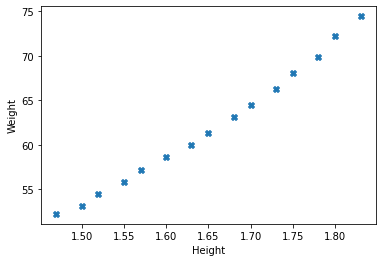

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['Height'], df['Weight'], marker='X')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

Looking at the distribution of the data, it seems like `Weight` and `Height` have a linear relationship. Hence, a linear regression model should be able to capture this relationship.  

Let's us convert the dataframe `df` to a Numpy array so that it is easier to perform operations on it.

In [6]:
X_train = np.array(df['Height'])
y_train = np.array(df['Weight'])
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LinearRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [16]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Linear Regression model using Batch Gradient Descent.

        Args:
            lr: Learning rate (float)
            epochs: Number of training iterations (int)
        """
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        """
        Initialize weights and train the model using batch gradient descent.

        Args:
            X: Feature matrix of shape (n_samples, n_features)
            y: Target vector of shape (n_samples,)
        """
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            self.update_weights(X, y)

    def update_weights(self, X, y):
        """
        Compute gradients and update the weights and bias.

        Args:
            X: Feature matrix of shape (n_samples, n_features)
            y: Target vector of shape (n_samples,)
        """
        n_samples = X.shape[0]


        y_pred = np.dot(X, self.weights) + self.bias

        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)


        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def predict(self, X):
        """
        Predict target values for given input features.

        Args:
            X: Feature matrix of shape (n_samples, n_features)

        Returns:
            y_pred: Predicted values (numpy array)
        """
        return np.dot(X, self.weights) + self.bias


### Build the model and train on the dataset.

In [17]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `mean squared error`.
We use the [mean squared error (MSE)](https://en.wikipedia.org/wiki/Mean_squared_error) as the metric to evaluate our model.

In [20]:
def mean_squared_error(y_pred, y_actual):
    """
    Calculates the mean squared error between two vectors.

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The mean squared error.
    """
    ######################
    #   YOUR CODE HERE   #
    ######################
    diff = y_pred - y_actual
    mse = (diff ** 2).mean()
    return mse


### Make predictions using the model and evaluate it.

In [21]:
y_pred = model.predict(X_train)
print("Train MSE: {:.4f}".format(mean_squared_error(y_pred, y_train)))

Train MSE: 0.5197


### Plot the predicted and the actual values.

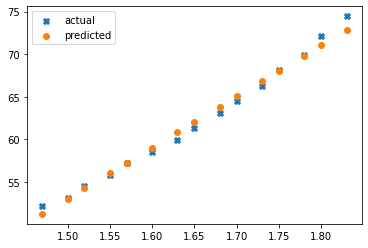

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='X', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.legend()
plt.show()

### Multiple linear regression for sales prediction

Next we use our linear regression model to learn the relationship between sales and advertising budget for a product. The `advertising.csv` dataset contains statistics about the sales of a product in 200 different markets, together with advertising budgets in each of these markets for different media channels: TV, radio, and newspaper. The sales are in thousands of units and the budget is in thousands of dollars.  

We will train a linear regression model to predict the sales of the product given the TV, radio, and newspaper ad budgets.

In [24]:
df = pd.read_csv('./advertising.csv')

In [25]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [26]:
X = np.array(df[['TV', 'Radio', 'Newspaper']])
y = np.array(df['Sales'])

### (5 points) Normalize the features in your dataset.

Gradient descent-based models can be sensitive to different scales of the features/independent variables. Hence, it is important to normalize them. You may use the functions, `dataset_minmax`, `normalize_dataset`, and `unnormalize_dataset`, provided in the code block below to perform [min-max normalization](https://en.wikipedia.org/wiki/Feature_scaling) on the features.

In [27]:
def dataset_minmax(dataset):
    """
    Finds the min and max values for each column.
    """
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax

def normalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to the range 0-1.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
    return dataset

def unnormalize_dataset(dataset, minmax):
    """
    Rescales dataset columns to their original values.
    """
    for row in dataset:
        for i in range(len(row)):
            row[i] = minmax[i][0] + (minmax[i][1] - minmax[i][0]) * row[i]
    return dataset

In [44]:
dataset = df.values.tolist()

minmax = dataset_minmax(dataset)

normalized_dataset = normalize_dataset(dataset, minmax)

normalized_dataset = np.array(normalized_dataset)


X = normalized_dataset[:, :-1]
y = normalized_dataset[:, -1]



### Split the data into train and test set.

In [39]:
def split_indices(n, test_frac, seed):
    """
    Provides indices for creating training and test set.
    """
    # Determine the size of the test set
    n_test = int(test_frac * n)
    np.random.seed(seed)
    # Create random permutation between 0 to n-1
    idxs = np.random.permutation(n)
    # Pick first n_test indices for test set
    return idxs[n_test:], idxs[:n_test]

In [40]:
test_frac = 0.2 ## Set the fraction for the test set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 160
#samples in test set: 40


In [45]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [46]:
model = LinearRegression(0.01, 100000)
model.train(X_train, y_train)

### (10 points) Evaluation on training and test set.
If you have implemented `LinearRegression` correctly, the **test MSE** should be < 3.

In [47]:
print("Training MSE: {:.4f}".format(mean_squared_error(model.predict(X_train), y_train)))
print("Test MSE: {:.4f}".format(mean_squared_error(model.predict(X_test), y_test)))

Training MSE: 0.0041
Test MSE: 0.0045


## Question 2 (50 points)

## Logistic Regression

In this section, we'll implement a logistic regression model that can learn to predict the class/label of a target/dependent variable based on multiple independent variables. We'll be using gradient descent to train the model.

### Data Preparation
Once again, to keep things simple, first we'll use the heights and weights dataset to test our implementation. Let's divide the weights into 2 categories: 0 if the weight is < 60 and 1 otherwise. Our goal is to predict the weight category of an individual given their height using a logistic regression model.

In [100]:
df = pd.read_csv('./heights.csv')
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [101]:
X_train = np.array(df['Height'])
y_train = np.array((df['Weight'] >= 60).astype('float'))
X_train = np.expand_dims(X_train, -1)

### (30 points) Implement the ` LogisticRegression` class
Make sure it works with more than 1 feature.  
**NOTE:** Do **NOT** forget to include a bias term in the weights.

In [105]:
import numpy as np

class LogisticRegression:
    def __init__(self, lr=0.001, epochs=30):
        """
        Fits a logistic regression model on a given dataset.

        Args:
            lr: learning rate
            epochs: number of iterations over the dataset
        """
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """
        Compute the sigmoid function.
        """
        return 1 / (1 + np.exp(-z))

    def train(self, X, y):
        """
        Initialize weights. Iterate through the dataset and update weights once every epoch.

        Args:
            X: features (numpy array of shape [n_samples, n_features])
            y: target (numpy array of shape [n_samples])
        """
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            self.update_weights(X, y)

    def update_weights(self, X, y):
        """
        Helper function to calculate the gradients and update weights in gradient descent.

        Args:
            X: features
            y: target
        """
        n_samples = X.shape[0]

        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_output)


        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)


        self.weights -= self.lr * dw
        self.bias -= self.lr * db

    def predict(self, X):
        """
        Predict probabilities using the weights.

        Args:
            X: features

        Returns:
            Predicted binary labels (0 or 1)
        """
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_output)
        return y_pred


### Build the model and train on the dataset.

In [106]:
model = LogisticRegression(0.1, 100000)
model.train(X_train, y_train)

### (5 points) Implement the evaluation metric `accuracy`.
We use the [accuracy](https://developers.google.com/machine-learning/crash-course/classification/accuracy) as the metric to evaluate our model.

In [107]:
def accuracy(y_pred, y_actual):
    """
    Calculates the accuracy of the predictions (binary values).

    Args:
        y_pred: predicted values
        y_actual: actual/true values

    Returns:
        The accuracy (float between 0 and 1).
    """
    y_pred = np.array(y_pred)
    y_actual = np.array(y_actual)
    correct = np.sum(y_pred == y_actual)
    total = len(y_actual)
    return correct / total


### Make predictions using the model and evaluate it.

In [109]:
y_pred_probs 


array([0.00604208, 0.01489308, 0.02700233, 0.06456338, 0.11244851,
       0.23959911, 0.43935351, 0.58991373, 0.78154645, 0.86785171,
       0.94230664, 0.96772277, 0.98676642, 0.99274707, 0.99707101])

In [110]:
y_pred 

array([0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [112]:
y_pred_probs = model.predict(X_train)
y_pred = (y_pred_probs >= 0.5).astype('float')
print("Train Accuracy: {}".format(accuracy(y_pred, y_train)))

Train Accuracy: 1.0


### Plot the predicted and the actual values.

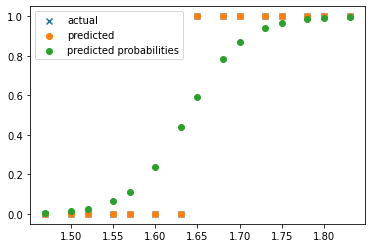

In [111]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, marker='x', label='actual')
plt.scatter(X_train, y_pred, marker='o', label='predicted')
plt.scatter(X_train, y_pred_probs, marker='o', label='predicted probabilities')
plt.legend()
plt.show()

### Multiple logistic regression to identify forged banknotes.

Next we train our logistic regression model to identify forged banknotes. The `banknote_authentication.csv` dataset has been created from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.  

We will train a logistic regression model to distinguish between genuine and forged banknotes given features extarcted from their images.

In [59]:
df = pd.read_csv('./banknote.csv')

In [60]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [61]:
X = np.array(df[['variance', 'skewness', 'curtosis', 'entropy']])
y = np.array(df['class'])

### (5 points) Normalize the features in your dataset.

In [62]:
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X = (X - X_min) / (X_max - X_min)



### Split the data into train and test set.

In [63]:
test_frac = 0.2 ## Set the fraction for the validation set
rand_seed = 42 ## Set the random seed

train_indices, test_indices = split_indices(df.shape[0], test_frac, rand_seed)
print("#samples in training set: {}".format(len(train_indices)))
print("#samples in test set: {}".format(len(test_indices)))

#samples in training set: 1098
#samples in test set: 274


In [64]:
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

### Build the model and train on the dataset.

In [65]:
model = LogisticRegression(0.1, 10000)
model.train(X_train, y_train)

### (10 points) Evaluation on training and test set.
If you have implemented `LogisticRegression` correctly, the **test accuracy** should be > 0.98.

In [66]:
print("Train Accuracy: {:.4f}".format(accuracy((model.predict(X_train) >= 0.5).astype('float'), y_train)))
print("Test Accuracy: {:.4f}".format(accuracy((model.predict(X_test) >= 0.5).astype('float'), y_test)))

Train Accuracy: 0.9545
Test Accuracy: 0.9270
